In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/MyDrive/major_project_cmpt_733')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
final_data = pd.read_csv("/content/drive/MyDrive/major_project_cmpt_733/finalData.csv")

In [4]:
final_data.head()

,Unnamed: 0,Title,Link,Genre,Developer,Publisher,Released Date,Plots,Price,Rating
0,0,1-2-Switch,/wiki/1-2-Switch,Party,Nintendo EPD,Nintendo,"March 3, 2017",1-2-Switch is a party game in which players d...,37.971064,8.147500
1,1,10 Second Ninja X,/wiki/10_Second_Ninja_X,Action platformer,Four Circle Interactive,Thalamus Digital,"July 30, 2021",10 Second Ninja X is a sidescrolling puzzle p...,23.586207,7.333950
2,2,13 Sentinels Aegis Rim,/wiki/13_Sentinels_Aegis_Rim,Adventure,Vanillaware,Atlus,"April 12, 2022",13 Sentinels: Aegis Rim is a video game where...,39.990000,8.785000
3,3,140,/wiki/140_(video_game),Action,Carlsen Games,Carlsen Games,"January 9, 2020","As described by Carlsen, 140 is ""an old schoo...",23.586207,7.333950
4,4,198X,/wiki/198X,Arcade,Hi-Bit Studios,JP,"January 23, 2020",In an introductory sequence entitled Beating ...,24.576316,7.439789


In [5]:
# Check the data type of the "Released Date" column and convert it to a string format if necessary
if final_data["Released Date"].dtype != "object":
    final_data["Released Date"] = final_data["Released Date"].astype(str)

# Feature Engineering: Extract the year from the "Released Date" column
final_data["Released Date"] = final_data["Released Date"].str.extract('(\w+\s\d{1,2},\s\d{4})', expand=False)

# Convert "Released Date" to datetime format
final_data["Released Date"] = pd.to_datetime(final_data["Released Date"])

# Extract year from "Released Date"
final_data["Year"] = final_data["Released Date"].dt.year

[QUES] What is the market share of top 10 game developers in terms of the number of games they have published?

> 


[ANS] The pie chart of market share of top 10 game developers shows the distribution of games among the top ten game developers indicating the market share of these top companies.

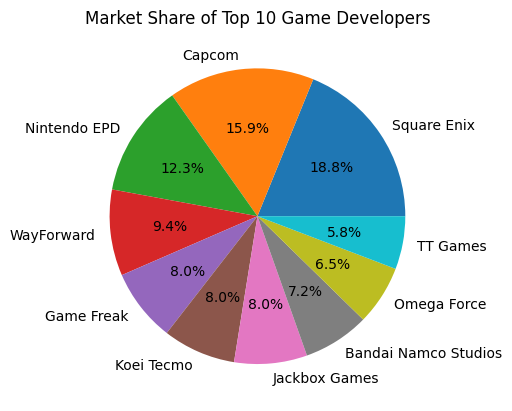

In [6]:
# Import the pandas library as pd and the matplotlib.pyplot module as plt
import pandas as pd
import matplotlib.pyplot as plt

# get the top 10 game developers based on number of games published
top_developers = final_data['Developer'].value_counts().nlargest(10)

# create a pie chart
plt.pie(top_developers.values, labels=top_developers.index, autopct='%1.1f%%')
# Set the title of the pie chart
plt.title('Market Share of Top 10 Game Developers')
# Display the pie chart
plt.show()


[QUES]
What does the distribution of games by publisher plot show and what are some insights that can be gained from it?

> 

[ANS]
The plot shows the distribution of games by publisher, displaying the number of games released by each of the top 20 publishers. It provides insight into which publishers have released the most games, as well as how the number of games released by each publisher compares to one another.We can also see how the number of games published by each publisher compares to others. The most number of games were relased by the publisher JP followed by nintendo and square enix.




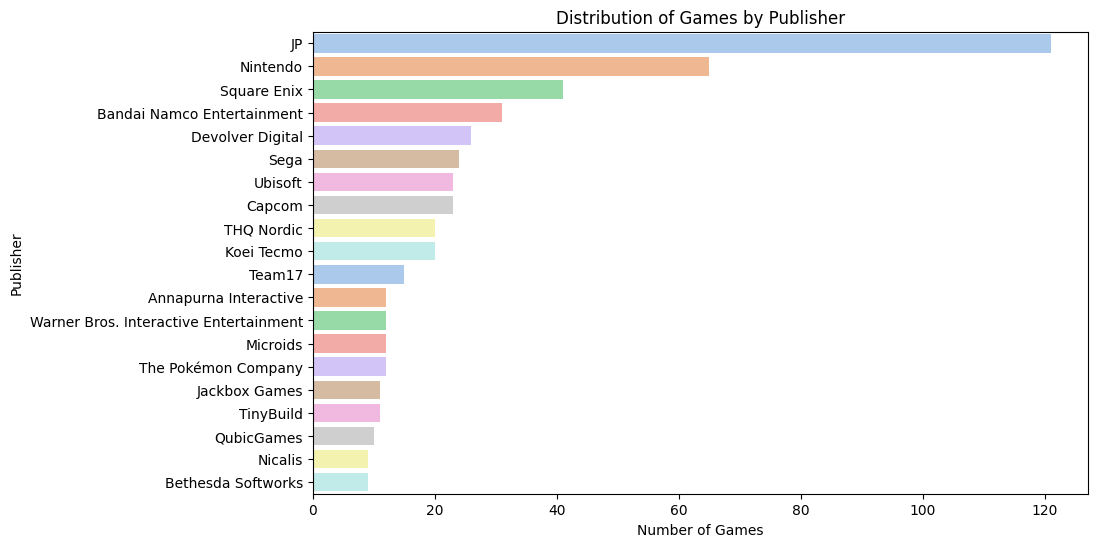

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Games by Publisher
plt.figure(figsize=(10,6))
# Create a count plot of the number of games published by each publisher in the final_data dataframe, and select the top 20 publishers based on the number of games published
sns.countplot(y=final_data['Publisher'], order=final_data['Publisher'].value_counts().iloc[:20].index, palette='pastel')
# Set the title of the graph
plt.title('Distribution of Games by Publisher')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
# Display the count plot
plt.show()



[QUES] What is the distribution of game prices in the dataset?

>


[ANS] The histogram shows the distribution of game prices in the dataset. It indicates that the majority of games have a price between 0 and 30 dollars, with a peak around 25 dollars. 
Additionally, the distribution is positively skewed, meaning that there are a few games with a much higher price than the majority.

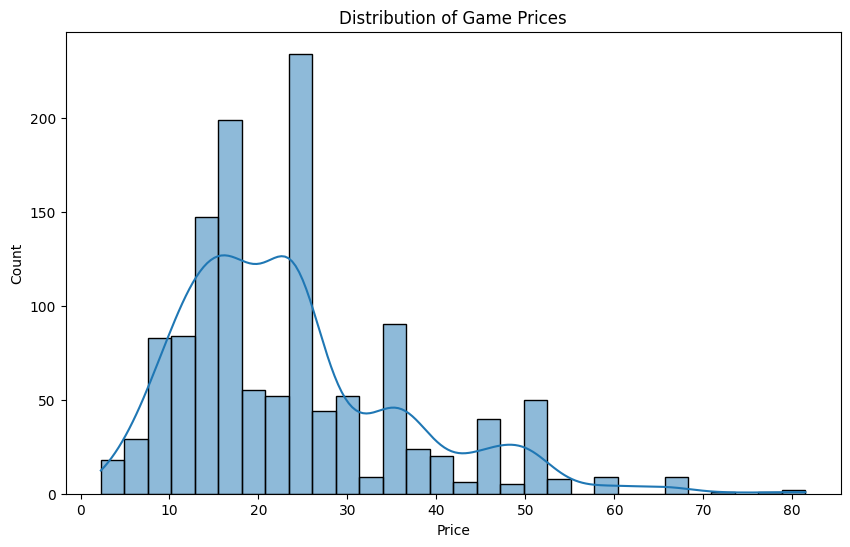

In [8]:
plt.figure(figsize=(10,6))
# Create a histogram of the distribution of game prices using the 'Price' column of the mydf dataframe
sns.histplot(x='Price', data=final_data, kde=True)
# Set the title of the histogram
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Count')
# Display the histogram
plt.show()


[QUES] 
What is the trend in the number of games released by genre from before and after covid-19?

> 
[ANS]
The graph shows the number of games released by genre for the past six-years (2017-2023),providing insights into the popularity of different game genres before and after covid-19. "Platformer" and "adventure" games had the highest number of releases in 2018, while "action" games experienced a consistent trend with minor fluctuations throughout the period. This data can help game developers and publishers make strategic decisions about which genres to focus on, and identify trends and shifts in the gaming industry.



<ipython-input-9-12582bbd330b>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_pivot.index.astype(str).str[:4], rotation=45)


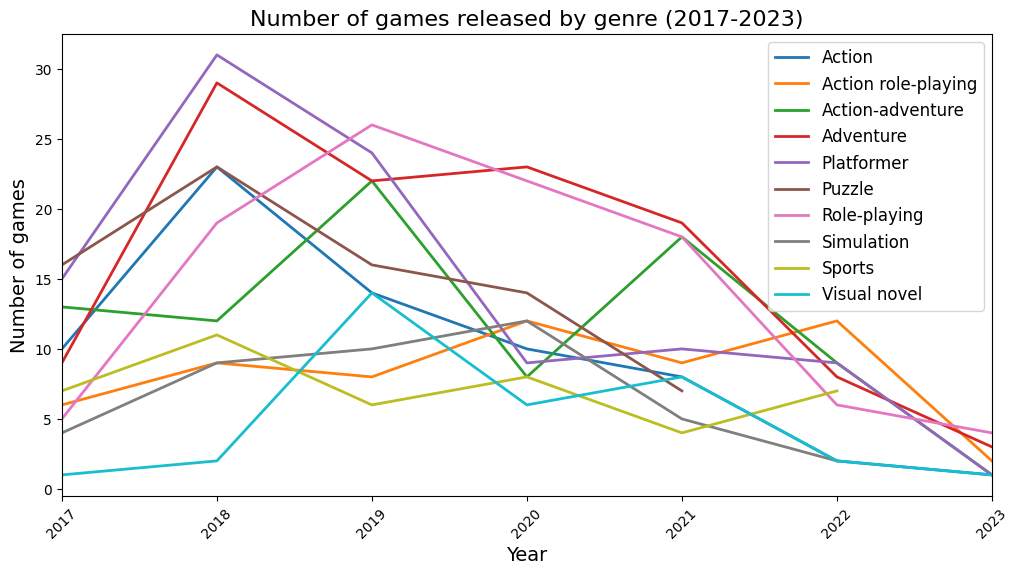

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from a CSV file
df = final_data

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filter the data for the past decade (2013-2023)
df = df[(df['Year'].dt.year >= 2017) & (df['Year'].dt.year <= 2023)]

# Select the top 10 genres based on the number of games released
top_genres = df.groupby('Genre').size().sort_values(ascending=False).head(10).index

# Filter the data for the top 10 genres
df = df[df['Genre'].isin(top_genres)]

# Group the data by year and genre
df_grouped = df.groupby(['Year', 'Genre']).size().reset_index(name='num_games')

# Pivot the data to create a wide format for plotting
df_pivot = df_grouped.pivot(index='Year', columns='Genre', values='num_games')

# Create the line chart
ax = df_pivot.plot(kind='line', figsize=(12, 6), linewidth=2)

# Set the chart title and axis labels
ax.set_title('Number of games released by genre (2017-2023)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of games', fontsize=14)

# Format the x-axis labels
ax.set_xticklabels(df_pivot.index.astype(str).str[:4], rotation=45)

# Show the legend
ax.legend(fontsize=12)

# Show the plot
plt.show()


[QUES] How to choose a genre that is popular among gamers and make data-driven decisions?

> 

[ANS] The visualization shows the top 10 game genres based on the number of games present in the dataset.The plot reveals that the Adventure genre is the most common genre, followed by Role-Playing and Platformer. This indicates that there are more games developed under the Adventure and Role-playing genres as compared to other genres.



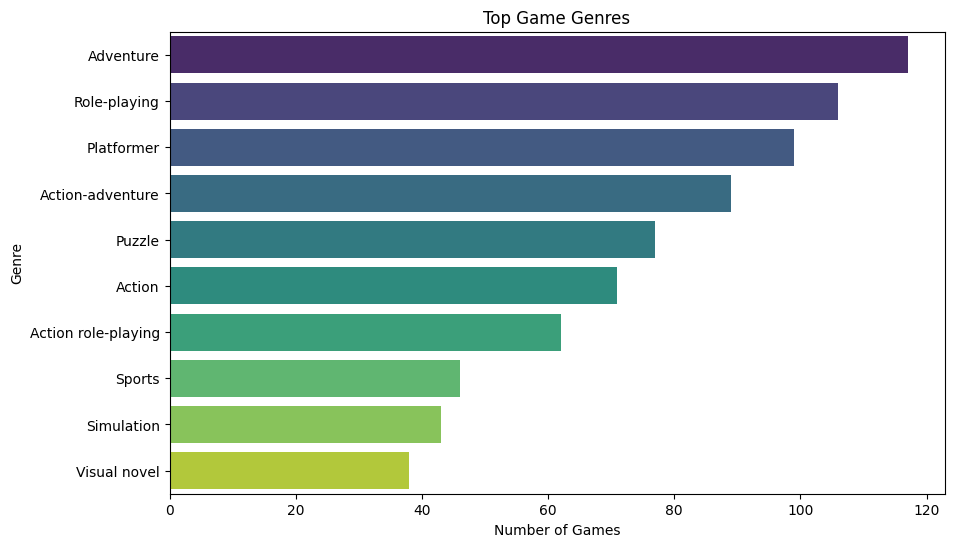

In [10]:
# Top game genres
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
# Get the count of the number of games belonging to each genre in the final_data dataframe and select the top 10 genres
genre_counts = final_data['Genre'].value_counts().head(10)
# Create a bar plot of the top 10 genres and their respective game counts
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
# Set the title of the graph
plt.title('Top Game Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
# Display the bar plot
plt.show()


[QUES] What are some of the already available games that SFU can invest in, in order to almost instantl increase engagement?

>

[ANS] This visualization shows the relative rating of the top 10 games and allows for easy comparison between them.
This insight can easily help SFU/ any other organisation looking to instantly invest in new, publicly pleasing games.
This insight is also useful for game developers who want to understand what aspects of a game are most important for a high rating. 
It could also be useful for gamers who are looking for popular games with high ratings to play.

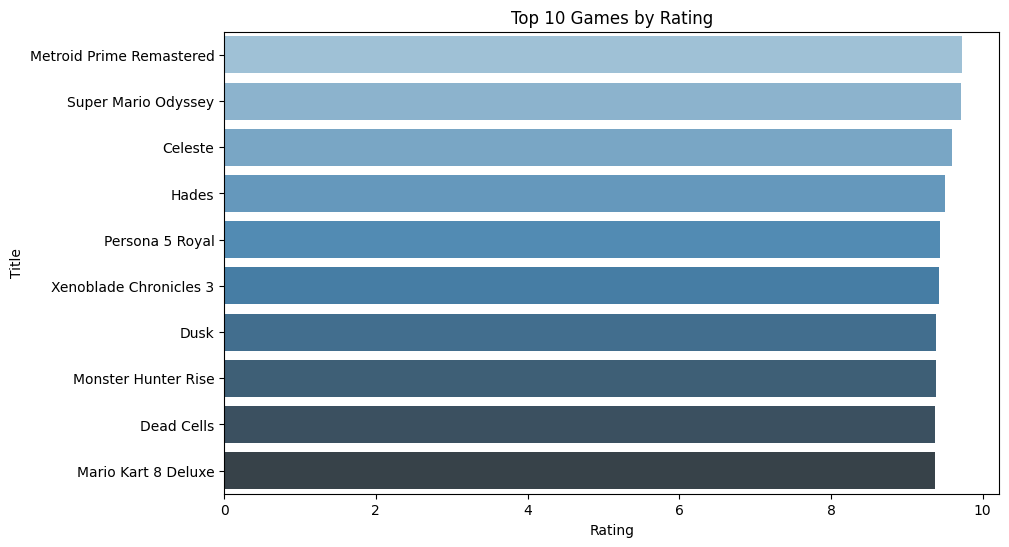

In [11]:
# Top 10 games by rating and price
top10_rating = final_data.sort_values(by='Rating', ascending=False).head(10)
top10_price = final_data.sort_values(by='Price').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Title', data=top10_rating, palette='Blues_d')
#Name the title of the graph
plt.title('Top 10 Games by Rating')
plt.xlabel('Rating')
plt.ylabel('Title')
#Plot the graph
plt.show()

[QUES] What is the relationship between the price of games and their liking among the gamers?

>

[ANS] The Price vs Rating scatter plot helps to identify any potential relation between the price of a game and its rating. From the scatter plot, we can observe that most of the games that are lower in price and under a budget, are largely liked by the gaming community. There are a few outlier, with high price and relatively lower ratings, indicating that the gamers are less willing to pay higher prices for games that are not well-rated.

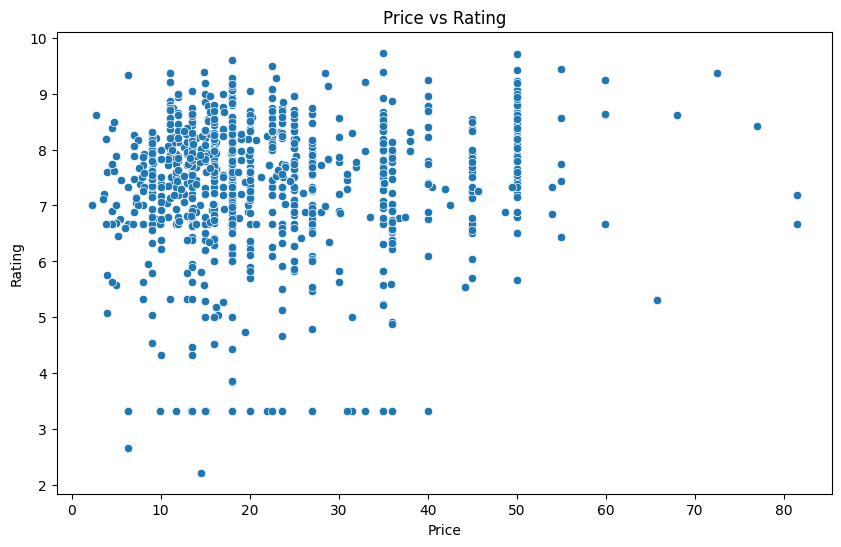

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
# Create a scatter plot of the relationship between game prices and ratings using the 'Price' and 'Rating' columns of the dataframe
sns.scatterplot(x='Price', y='Rating', data=final_data)
# Set the title of the graph
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
# Display the scatter plot
plt.show()


[QUES] What are some of the most engaging games that are affordable for SFU to keep in games rooms , based on their popularity and cost-effectiveness?


[ANS] The plot shows the top 10 most engaging and cost-effective games for SFU game rooms. These games have a high popularity score, which is calculated as the ratio of their rating to their price. We can see which games are most popular and affordable for SFU to keep in their game rooms by looking at the plot.
For example, we can see that "Downwell" has the highest popularity score among the top 10 games, followed by "Love" and "Among Us".

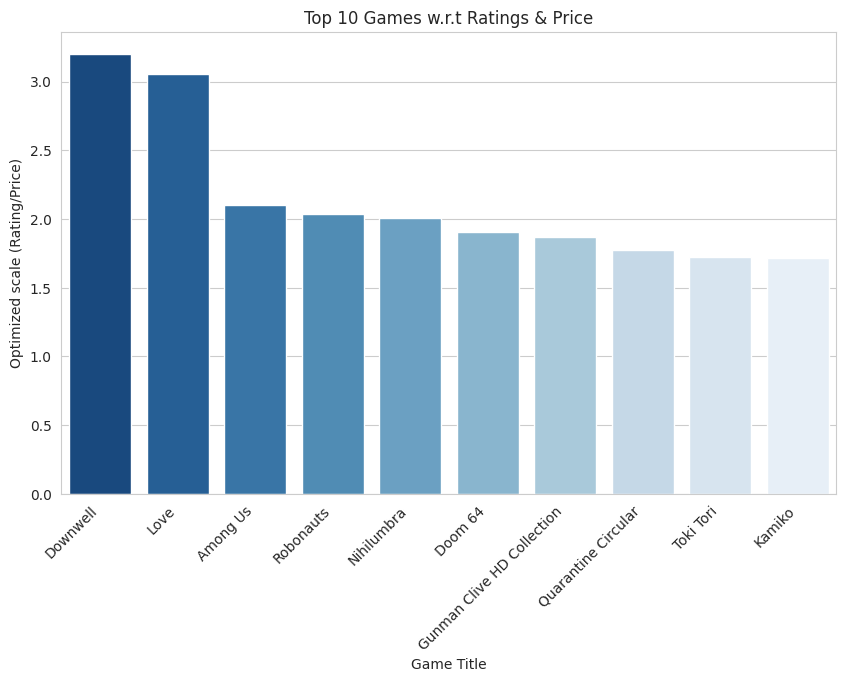

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = final_data

# Calculate the profitability of each game
data['Profitability'] = data['Rating'] * (1/data['Price'])

# Sort the data based on profitability
sorted_data = data.sort_values(by=['Profitability'], ascending=False)

# Select the top 10 games
top_10 = sorted_data.head(10)

# Create a bar plot showing the profitability of each game
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Title', y='Profitability', data=top_10, palette='Blues_r', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Game Title')
ax.set_ylabel('Optimized scale (Rating/Price)')
ax.set_title('Top 10 Games w.r.t Ratings & Price')
plt.show()
